In [2]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import plot_roc_curve, auc, roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve

#_________!!!!!!!!!!!!!!!!!!!!______________

# sns.heatmap(df.isna())


# sns.heamap(df[numerical fe].corr().abs(), annot=True)

In [3]:
df = pd.read_csv('data/train.csv')
df['Sex'] = (df['Sex'] == 'male').astype(int)
# df.describe()
# df.info()
# sns.pairplot(df, hue="Survived")

In [4]:
# df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [5]:
# df.head()

In [6]:
# enc = OneHotEncoder(sparse=False,handle_unknown='ignore')
# col = df
# col1 = col[['Embarked']]
# enc.fit(col1)
# t = enc.transform(col1)
# df = df.merge(pd.DataFrame(t, columns=enc.get_feature_names()),left_index=True, right_index=True)
# df.head()

In [7]:
df = df.merge(pd.get_dummies(df['Embarked']),left_index=True, right_index=True)
# d=pd.get_dummies(df['Embarked'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,0,1


In [10]:
df.groupby(['Survived',  'Pclass', 'Sex', 'C','Q','S']).count()



PassengerId  Name  Age  SibSp  Parch  Ticket  Fare  \
Survived Pclass Sex C Q S                                                       
0        1      0   0 0 1            2     2    2      2      2       2     2   
                    1 0 0            1     1    1      1      1       1     1   
                1   0 0 1           51    51   40     51     51      51    51   
                      1 0            1     1    1      1      1       1     1   
                    1 0 0           25    25   20     25     25      25    25   
         2      0   0 0 1            6     6    6      6      6       6     6   
                1   0 0 1           82    82   76     82     82      82    82   
                      1 0            1     1    1      1      1       1     1   
                    1 0 0            8     8    7      8      8       8     8   
         3      0   0 0 1           55    55   45     55     55      55    55   
                      1 0            9     9    5      9      9       9     9   
                    1 0 0            8     8    5      8      8       8     8   
                1   0 0 1          231   231  184    231    231     231   231   
                      1 0           36    36   13     36     36      36    36   
                    1 0 0           33    33   18     33     33      33    33   
1        1      0   0 0 0            2     2    2      2      2       2     2   
                        1           46    46   42     46     46      46    46   
                      1 0            1     1    1      1      1       1     1   
                    1 0 0           42    42   37     42     42      42    42   
                1   0 0 1           28    28   24     28     28      28    28   
                    1 0 0           17    17   16     17     17      17    17   
         2      0   0 0 1           61    61   60     61     61      61    61   
                      1 0            2     2    1      2      2       2     2   
                    1 0 0            7     7    7      7      7       7     7   
                1   0 0 1           15    15   14     15     15      15    15   
                    1 0 0            2     2    1      2      2       2     2   
         3      0   0 0 1           33    33   31     33     33      33    33   
                      1 0           24    24    5     24     24      24    24   
                    1 0 0           15    15   11     15     15      15    15   
                1   0 0 1           34    34   30     34     34      34    34   
                      1 0            3     3    1      3      3       3     3   
                    1 0 0           10    10    7     10     10      10    10   

                           Cabin  Embarked  
Survived Pclass Sex C Q S                   
0        1      0   0 0 1      2         2  
                    1 0 0      1         1  
                1   0 0 1     40        51  
                      1 0      1         1  
                    1 0 0     15        25  
         2      0   0 0 1      1         6  
                1   0 0 1      1        82  
                      1 0      0         1  
                    1 0 0      1         8  
         3      0   0 0 1      2        55  
                      1 0      0         9  
                    1 0 0      0         8  
                1   0 0 1      3       231  
                      1 0      1        36  
                    1 0 0      0        33  
1        1      0   0 0 0      2         0  
                        1     41        46  
                      1 0      1         1  
                    1 0 0     34        42  
                1   0 0 1     23        28  
                    1 0 0     16        17  
         2      0   0 0 1      7        61  
                      1 0      1         2  
                    1 0 0      1         7  
                1   0 0 1      4        15  
                    1 0 0      0         2  
         3  

<AxesSubplot:xlabel='Survived', ylabel='count'>

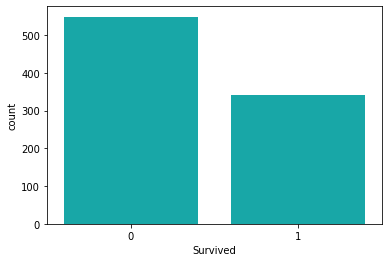

In [5]:
sns.countplot(x='Survived', data=df, color="c")

In [11]:
df.Survived[(df['Survived'] == 1) & (df['Pclass'] == 1)].count()

136

In [7]:
df.Pclass[df['Pclass']==1].value_counts()

1    216
Name: Pclass, dtype: int64

In [8]:
136/216 #survived people from 1st class 

0.6296296296296297

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

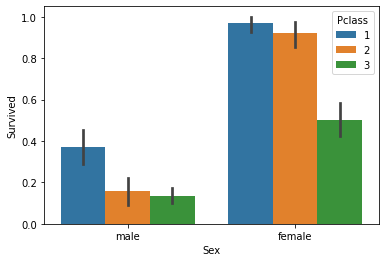

In [9]:
df.Pclass.astype(str)
sns.barplot(x = 'Sex', y = 'Survived',  hue = 'Pclass', data = df)

<AxesSubplot:xlabel='Fare', ylabel='Age'>

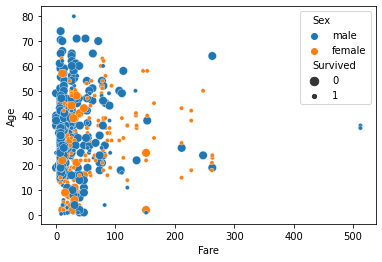

In [10]:
sns.scatterplot(y = 'Age', x = 'Fare', hue = 'Sex', data = df, size = 'Survived')

In [11]:
# df[df['Survived'] == 1].Age.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
df.loc[(df['Survived'] == 1) & (df.Age.isnull()), 'Age'] = 28
# df[(df['Survived'] == 1) & (df.Age.isnull())].fillna(28)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          766 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
# df[df['Survived'] == 0].Age.describe()

In [14]:
df.loc[(df['Survived'] == 0) & (df.Age.isnull()), 'Age'] = 30
# df[(df['Survived'] == 0) & (df.Age.isnull())].fillna(30)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
df1 = df.iloc[:,:4]

In [17]:
df1.head()

,PassengerId,Survived,Pclass,Name
0,1,0,3,"Braund, Mr. Owen Harris"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,1,3,"Heikkinen, Miss. Laina"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,0,3,"Allen, Mr. William Henry"


In [18]:
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

In [19]:
kbins = KBinsDiscretizer(n_bins=5, encode='onehot-dense', strategy='uniform')

# encode='onehot-dense', strategy='uniform'

In [20]:
columns = df[['Age']]

In [21]:
kbins.fit(columns)

KBinsDiscretizer(encode='onehot-dense', strategy='uniform')

In [22]:
# t = kbins.transform(columns)
# t.shape

(891, 5)

In [23]:
# edges = kbins.bin_edges_[0].round(0)
# edges

array([ 0., 16., 32., 48., 64., 80.])

In [24]:
# labels = []
# for i in range(len(edges)-1):
#     edge1 = edges[i]
#     edge2 = edges[i+1]
#     labels.append(f"{edge1}_to_{edge2}")


In [25]:

# # create a DataFrame
# df_bins = pd.DataFrame(t, columns=labels)
# df_bins.head()

,0.0_to_16.0,16.0_to_32.0,32.0_to_48.0,48.0_to_64.0,64.0_to_80.0
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0


In [26]:

# df = df.join(df_bins, how='outer')

In [27]:

y = df.iloc[:,1]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [28]:

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,0.0_to_16.0,16.0_to_32.0,32.0_to_48.0,48.0_to_64.0,64.0_to_80.0
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,1.0,0.0,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0.0,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,1.0,0.0,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0.0,0.0,1.0,0.0,0.0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0.0,0.0,1.0,0.0,0.0


In [40]:
X = df.iloc[:, [2,4,12,13,14,15,16]]
X.head()

,Pclass,Sex,0.0_to_16.0,16.0_to_32.0,32.0_to_48.0,48.0_to_64.0,64.0_to_80.0
0,3,1,0.0,1.0,0.0,0.0,0.0
1,1,0,0.0,0.0,1.0,0.0,0.0
2,3,0,0.0,1.0,0.0,0.0,0.0
3,1,0,0.0,0.0,1.0,0.0,0.0
4,3,1,0.0,0.0,1.0,0.0,0.0


In [41]:
X.shape, y.shape

((891, 7), (891,))

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6)

In [43]:
m = LogisticRegression() #create a model
m.fit(X_train,y_train) 

LogisticRegression()

In [44]:
m.score(X_train,y_train)  #0.8052434456928839

0.797752808988764

In [45]:
ypred = m.predict(X_test) 
accuracy_score(y_test,ypred)  #0.7899159663865546

0.7831775700934579

In [35]:
precision = precision_score(y_test,ypred)
recall = recall_score(y_test,ypred)

print(precision_score(y_test,ypred), recall_score(y_test,ypred))

0.7365591397849462 0.6782178217821783


In [36]:
conf = confusion_matrix(y_test,ypred)
conf

array([[284,  49],
       [ 65, 137]])

Text(0.5, 1.0, 'Confusion Matrix')

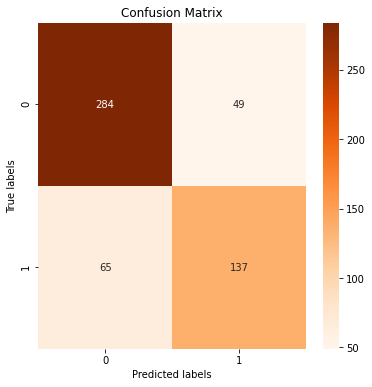

In [37]:
#plot the heatmap
fig = plt.figure(figsize=(6, 6))
ax = plt.subplot()
sns.heatmap(conf, annot=True, ax = ax, fmt='g', cmap = 'Oranges')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')

In [38]:
probs = m.predict_proba(X_test) 
fpr, tpr, threshold = roc_curve(y_test, probs[:,1])

In [39]:
probs[:5]

array([[0.12284686, 0.87715314],
       [0.90426924, 0.09573076],
       [0.77056598, 0.22943402],
       [0.81851791, 0.18148209],
       [0.04162645, 0.95837355]])

In [32]:
probs[0][0] + probs[0][1] 

1.0

Area under the curve =  0.8663784368033507


(0.0, 1.0)

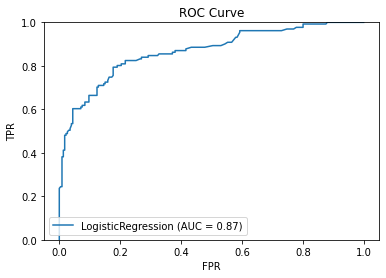

In [33]:
# Calculating area under the curve
auc_score = auc(fpr, tpr)
print("Area under the curve = ",auc_score)

plot_roc_curve(m, X_test, y_test)  
plt.title("ROC Curve")

plt.ylabel("TPR")
plt.xlabel("FPR")
plt.legend(loc="lower left")
plt.ylim([0,1.00])

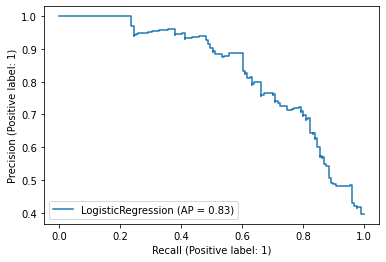

In [34]:
# plot precision and recall curve 
plot_precision_recall_curve(m, X_test, y_test)

In [35]:
precisions, recalls, thresholds = precision_recall_curve(y_test, probs[:,1])

In [36]:
# compute area under precision recall curve 
pr_area = auc(recalls, precisions)
pr_area

0.8324094034697066

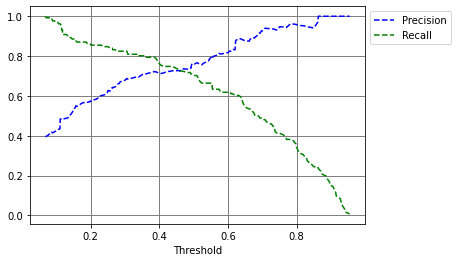

In [37]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
plt.xlabel("Threshold")
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)
plt.show()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB
